# **3.2 Dataset Analysis**


In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import os
import matplotlib.pyplot as plt
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns
import spacy
import collections


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


# **Tokenization and Stemming**

# Data Preparation

In [3]:
reviews = pd.read_json('/content/reviewSelected100 2.json', encoding = "ISO-8859-1", lines = True)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
reviews.groupby(['business_id']).size()

business_id
--I7YYLada0tSLkORTHb5Q    100
-7XWJYkutqhIxLen7Grg1g    100
0Rni7ocMC_Lg2UH0lDeKMQ    100
0kPm1zEpeXFRg8D2phqgCQ    100
1Fpk8ibHhZYnCw8fnGny8w    100
                         ... 
yHHVKa9joZAKiBDUp2SkKw    100
z8Em-bhZI3Mmspml7tj6tg    100
zPEYgVqJ2QNKi45FJi2jvg    100
zZ7KDK3GAkBUZzsaqB1A4Q    100
z_RTK0MaxaRHRQ99hDL2QA    100
Length: 153, dtype: int64

# Generating 2 random businesses

In [5]:
#Generate random B1
rand_bid = reviews['business_id'].sample()
rand_bid_str = rand_bid.to_string(index = False).strip()
b_id_grouped = reviews.groupby(['business_id'])
rand_biz_1 = b_id_grouped.get_group(rand_bid_str)
rand_biz_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
7230,QUkuOy7K-1dUa0nq0p6c4w,xtB67YuRwbbNFAuwbolqfg,0kPm1zEpeXFRg8D2phqgCQ,5,0,0,0,"Coffee is exponentially better than Starbucks,...",2015-05-26 16:25:34
7231,1uvOoxXzXk5thFeVQvLYyA,GdnJtqYWVSBAjya-WdN5RQ,0kPm1zEpeXFRg8D2phqgCQ,1,2,0,0,The absolute worst example of piss\nPoor custo...,2017-04-19 16:02:48
7249,91YyUWAV9ux8oGfOJr3c7w,uLKhhtHOOU6onHxECTY0Cw,0kPm1zEpeXFRg8D2phqgCQ,1,0,0,0,Went thru Drive-thru today at 9:45 am. Note sa...,2018-07-26 17:31:23
7294,V0JHjZKYngJrzYhDoBrHGQ,6inmoG4fNrs5GOKmrnWKCQ,0kPm1zEpeXFRg8D2phqgCQ,1,0,0,0,I love DD but today was the worst service. I h...,2016-06-01 13:44:41
7301,9-lH94TmJtMJVo1quzdVTQ,xPSXDnjJ_oXoVSlkvmDItA,0kPm1zEpeXFRg8D2phqgCQ,1,1,1,0,seriously what is up w this location?!? \nA fe...,2015-10-24 20:08:18


In [6]:
#Generate random B2
rand_bid = reviews['business_id'].sample()
rand_bid_str = rand_bid.to_string(index = False).strip()
b_id_grouped = reviews.groupby(['business_id'])
rand_biz_2 = b_id_grouped.get_group(rand_bid_str)
rand_biz_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
9344,fjcPAB3bbj7ya79zOA9SFQ,JXdXWUHt3OLYJ0umTMK9vw,suJ-eo5Gkvcg0iXVQw4RyA,2,0,0,0,My husband made this reservation. The hotel wa...,2016-08-25 18:30:29
9357,-kNYfLJoDzsFV_RIJT6Lng,u1fu_kECEW3A5f0mTQCQPw,suJ-eo5Gkvcg0iXVQw4RyA,2,1,1,0,"I generally like the Embassy Suites, but the s...",2018-07-17 04:56:21
9395,JlHbwkz_vX0rJnQWbXyJtQ,EaHRlbCrUk_KX-s3e1IgXA,suJ-eo5Gkvcg0iXVQw4RyA,2,1,0,0,"Overall, the cleanliness of the hotel was good...",2017-03-28 02:22:15
9427,GcMnwVCIJ9hoSheGJ4iT5g,_1VPTCgxTL6CL3b1Gf6xgQ,suJ-eo5Gkvcg0iXVQw4RyA,5,0,0,0,Really great room and location. Room price was...,2015-11-06 23:44:04
9467,ZtS1WFFAaQuyeXnJb-v6jw,ePOegof0by-woMsm_7OYbA,suJ-eo5Gkvcg0iXVQw4RyA,5,1,0,0,I've been traveling for work a lot lately and ...,2017-02-20 00:23:40


# Tokenizer, Stemmer and Frequency Distribution Functions

In [7]:
def NLTK_tokenizer(path):
  tokens_nltk = []
  sentence = word_tokenize(path)
  #print(sentence)
  for token in sentence:
    tokens_nltk.append(token)
  return tokens_nltk

In [8]:
def rem_sw(path):
  nltk_tokens_without_sw = [word for word in path if not word in stopwords.words()]
  return nltk_tokens_without_sw

In [9]:
def frequency_distribution(path):
  freqDist = nltk.FreqDist(path)
  print(freqDist)
  freqDist.plot(10)
#frequency_distribution(nltk_tokens_without_sw)

In [10]:
#stemmed_tokens_nltk = []
def nltk_stemming(path):
  stemmed_tokens_nltk = []
  ps = PorterStemmer()
  for w in path:
      #print(w, " : ", ps.stem(w))
      stemmed_tokens_nltk.append(ps.stem(w))
  return stemmed_tokens_nltk
#stemmed_tokens_nltk

# Frequency Distributions - Business 1


In [11]:
tokens_nltk = rand_biz_1.apply(lambda row : NLTK_tokenizer(row['text']), axis = 1)
print(type(tokens_nltk))
tokens_str = []
for list1 in tokens_nltk.tolist():
  for list2 in list1:
    tokens_str.append(list2)
#tokens_str

<class 'pandas.core.series.Series'>


In [12]:
nltk_tokens_without_sw = rem_sw(tokens_str)
#nltk_tokens_without_sw

<FreqDist with 1529 samples and 5753 outcomes>


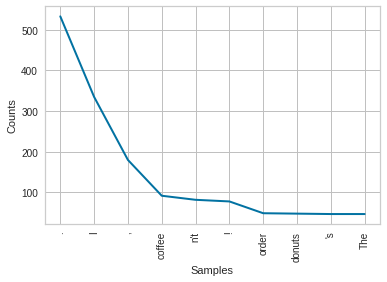

In [13]:
frequency_distribution(nltk_tokens_without_sw)

In [14]:
count_freq_no_stem = collections.Counter(nltk_tokens_without_sw)
top_10_no_stem = count_freq_no_stem.most_common(10)
print(top_10_no_stem)

[('.', 533), ('I', 335), (',', 180), ('coffee', 92), ("n't", 82), ('!', 78), ('order', 49), ('donuts', 48), ("'s", 47), ('The', 47)]


In [15]:
stemmed_tokens_nltk = nltk_stemming(nltk_tokens_without_sw)
#stemmed_tokens_nltk

<FreqDist with 1208 samples and 5753 outcomes>


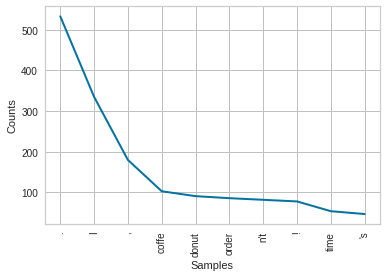

In [16]:
frequency_distribution(stemmed_tokens_nltk)

In [17]:
count_freq_stem = collections.Counter(stemmed_tokens_nltk)
top_10_stem = count_freq_stem.most_common(10)
print(top_10_stem)

[('.', 533), ('I', 335), (',', 180), ('coffe', 103), ('donut', 91), ('order', 86), ("n't", 82), ('!', 78), ('time', 54), ("'s", 47)]


# Tokens - Business 1 (for reference) 

In [18]:
tokens_str

['Coffee',
 'is',
 'exponentially',
 'better',
 'than',
 'Starbucks',
 ',',
 'Peet',
 "'s",
 ',',
 'etc',
 '.',
 'And',
 'the',
 'food',
 'is',
 'very',
 'solid',
 'for',
 'breakfast',
 ',',
 'even',
 'beyond',
 'their',
 'donuts',
 '.',
 'Everything',
 'is',
 'done',
 'with',
 'a',
 'great',
 'attitude',
 '.',
 'Call',
 'out',
 'to',
 'JOE',
 'C.',
 ',',
 'who',
 'is',
 'friendly',
 'and',
 'super',
 'efficient',
 '.',
 'Also',
 ',',
 'a',
 'killer',
 'name',
 'for',
 'someone',
 'who',
 'works',
 'in',
 'the',
 'coffee',
 'industry',
 '.',
 'The',
 'absolute',
 'worst',
 'example',
 'of',
 'piss',
 'Poor',
 'customer',
 'service',
 'one',
 'very',
 'well',
 'might',
 'experience',
 'anywhere',
 '.',
 'Unfriendly',
 ',',
 'slow',
 ',',
 'and',
 'cavalier',
 '.',
 'Deplorable',
 '.',
 'Went',
 'thru',
 'Drive-thru',
 'today',
 'at',
 '9:45',
 'am',
 '.',
 'Note',
 'says',
 'they',
 'can',
 'only',
 'accept',
 'cash',
 ',',
 'debit',
 'card',
 '&',
 'dd',
 'perks',
 '.',
 '5',
 'cars',


In [19]:
nltk_tokens_without_sw

['Coffee',
 'exponentially',
 'better',
 'Starbucks',
 ',',
 'Peet',
 "'s",
 ',',
 'etc',
 '.',
 'And',
 'food',
 'solid',
 'breakfast',
 ',',
 'even',
 'beyond',
 'donuts',
 '.',
 'Everything',
 'done',
 'great',
 'attitude',
 '.',
 'Call',
 'JOE',
 'C.',
 ',',
 'friendly',
 'super',
 'efficient',
 '.',
 'Also',
 ',',
 'killer',
 'someone',
 'works',
 'coffee',
 'industry',
 '.',
 'The',
 'absolute',
 'worst',
 'example',
 'piss',
 'Poor',
 'customer',
 'service',
 'well',
 'might',
 'experience',
 'anywhere',
 '.',
 'Unfriendly',
 ',',
 'slow',
 ',',
 'cavalier',
 '.',
 'Deplorable',
 '.',
 'Went',
 'thru',
 'Drive-thru',
 'today',
 '9:45',
 '.',
 'Note',
 'says',
 'accept',
 'cash',
 ',',
 'debit',
 'card',
 '&',
 'dd',
 'perks',
 '.',
 '5',
 'cars',
 'front',
 '.',
 'I',
 'got',
 'payment',
 'window',
 'told',
 'Cash',
 'payment',
 'cashier',
 'says',
 'I',
 'pay',
 'debit',
 'card',
 '&',
 'dd',
 'perks',
 'front',
 'inside',
 'store',
 '.',
 'So',
 'went',
 'inside',
 'waited',
 

In [20]:
stemmed_tokens_nltk

['coffe',
 'exponenti',
 'better',
 'starbuck',
 ',',
 'peet',
 "'s",
 ',',
 'etc',
 '.',
 'and',
 'food',
 'solid',
 'breakfast',
 ',',
 'even',
 'beyond',
 'donut',
 '.',
 'everyth',
 'done',
 'great',
 'attitud',
 '.',
 'call',
 'joe',
 'C.',
 ',',
 'friendli',
 'super',
 'effici',
 '.',
 'also',
 ',',
 'killer',
 'someon',
 'work',
 'coffe',
 'industri',
 '.',
 'the',
 'absolut',
 'worst',
 'exampl',
 'piss',
 'poor',
 'custom',
 'servic',
 'well',
 'might',
 'experi',
 'anywher',
 '.',
 'unfriendli',
 ',',
 'slow',
 ',',
 'cavali',
 '.',
 'deplor',
 '.',
 'went',
 'thru',
 'drive-thru',
 'today',
 '9:45',
 '.',
 'note',
 'say',
 'accept',
 'cash',
 ',',
 'debit',
 'card',
 '&',
 'dd',
 'perk',
 '.',
 '5',
 'car',
 'front',
 '.',
 'I',
 'got',
 'payment',
 'window',
 'told',
 'cash',
 'payment',
 'cashier',
 'say',
 'I',
 'pay',
 'debit',
 'card',
 '&',
 'dd',
 'perk',
 'front',
 'insid',
 'store',
 '.',
 'So',
 'went',
 'insid',
 'wait',
 'line',
 '.',
 '3',
 'peopl',
 'ahead',
 '

# Frequency Distributions - Business 2 

In [21]:
tokens_nltk = rand_biz_2.apply(lambda row : NLTK_tokenizer(row['text']), axis = 1)
print(type(tokens_nltk))
tokens_str = []
for list1 in tokens_nltk.tolist():
  for list2 in list1:
    tokens_str.append(list2)
#tokens_str

<class 'pandas.core.series.Series'>


In [22]:
nltk_tokens_without_sw = rem_sw(tokens_str)
#nltk_tokens_without_sw

<FreqDist with 2322 samples and 9033 outcomes>


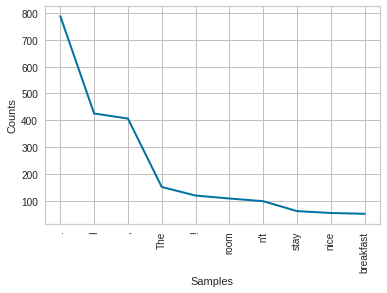

In [23]:
frequency_distribution(nltk_tokens_without_sw)

In [24]:
count_freq_no_stem = collections.Counter(nltk_tokens_without_sw)
top_10_no_stem = count_freq_no_stem.most_common(10)
print(top_10_no_stem)

[('.', 788), ('I', 425), (',', 406), ('The', 151), ('!', 119), ('room', 108), ("n't", 98), ('stay', 61), ('nice', 54), ('breakfast', 51)]


In [25]:
stemmed_tokens_nltk = nltk_stemming(nltk_tokens_without_sw)
#stemmed_tokens_nltk

<FreqDist with 1738 samples and 9033 outcomes>


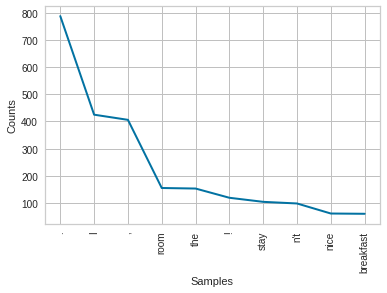

In [26]:
frequency_distribution(stemmed_tokens_nltk)

In [27]:
count_freq_stem = collections.Counter(stemmed_tokens_nltk)
top_10_stem = count_freq_stem.most_common(10)
print(top_10_stem)

[('.', 788), ('I', 425), (',', 406), ('room', 155), ('the', 153), ('!', 119), ('stay', 104), ("n't", 98), ('nice', 61), ('breakfast', 60)]


# Tokens - Business 2 (for reference)

In [28]:
# Tokens list with Stop words 
tokens_str

['My',
 'husband',
 'made',
 'this',
 'reservation',
 '.',
 'The',
 'hotel',
 'was',
 'under',
 'construction',
 'which',
 'did',
 "n't",
 'bother',
 'me',
 'too',
 'much',
 'except',
 'the',
 'fitness',
 'room',
 'was',
 "n't",
 'available',
 '.',
 'But',
 'not',
 'a',
 'big',
 'deal',
 '.',
 'The',
 'room',
 'was',
 'really',
 'nice',
 'and',
 'clean',
 '.',
 'Had',
 'an',
 'issue',
 'with',
 'the',
 'AC',
 'vent',
 'in',
 'the',
 'actual',
 'room',
 '.',
 'It',
 'was',
 "n't",
 'blowing',
 'into',
 'the',
 'room',
 '.',
 'We',
 'just',
 'adjusted',
 'the',
 'temperature',
 'to',
 'the',
 'lowest',
 'possible',
 'setting',
 'so',
 'that',
 'it',
 'eventually',
 'cooled',
 'the',
 'room',
 '.',
 'Breakfast',
 'was',
 'very',
 'good',
 '.',
 'The',
 'staff',
 'at',
 'the',
 'restaurant',
 'was',
 'very',
 'nice',
 'and',
 'friendly',
 '.',
 'Here',
 "'s",
 'why',
 'I',
 'am',
 'giving',
 'it',
 'two',
 'stars',
 '.',
 'My',
 'husband',
 'had',
 'a',
 'meeting',
 'but',
 'before',
 'lea

In [29]:
# Token list without Stop words
nltk_tokens_without_sw

['My',
 'husband',
 'made',
 'reservation',
 '.',
 'The',
 'construction',
 "n't",
 'bother',
 'much',
 'except',
 'fitness',
 'room',
 "n't",
 'available',
 '.',
 'But',
 'big',
 'deal',
 '.',
 'The',
 'room',
 'really',
 'nice',
 'clean',
 '.',
 'Had',
 'issue',
 'AC',
 'vent',
 'actual',
 'room',
 '.',
 'It',
 "n't",
 'blowing',
 'room',
 '.',
 'We',
 'adjusted',
 'temperature',
 'lowest',
 'possible',
 'setting',
 'eventually',
 'cooled',
 'room',
 '.',
 'Breakfast',
 'good',
 '.',
 'The',
 'staff',
 'restaurant',
 'nice',
 'friendly',
 '.',
 'Here',
 "'s",
 'I',
 'giving',
 'two',
 'stars',
 '.',
 'My',
 'husband',
 'meeting',
 'leaving',
 'asked',
 'I',
 'could',
 'late',
 'check-out',
 '.',
 'The',
 'staff',
 'said',
 'fine',
 ',',
 'I',
 'check',
 '1pm',
 '.',
 'Around',
 '11:30',
 'a.m.',
 'someone',
 'called',
 'room',
 'I',
 'tried',
 'answer',
 'whoever',
 'calling',
 'hung',
 'ring',
 'I',
 'finally',
 'caught',
 'phone',
 'hung',
 'ear',
 '.',
 'A',
 'minutes',
 'later',


In [30]:
# Token list after stemming
stemmed_tokens_nltk

['My',
 'husband',
 'made',
 'reserv',
 '.',
 'the',
 'construct',
 "n't",
 'bother',
 'much',
 'except',
 'fit',
 'room',
 "n't",
 'avail',
 '.',
 'but',
 'big',
 'deal',
 '.',
 'the',
 'room',
 'realli',
 'nice',
 'clean',
 '.',
 'had',
 'issu',
 'AC',
 'vent',
 'actual',
 'room',
 '.',
 'It',
 "n't",
 'blow',
 'room',
 '.',
 'We',
 'adjust',
 'temperatur',
 'lowest',
 'possibl',
 'set',
 'eventu',
 'cool',
 'room',
 '.',
 'breakfast',
 'good',
 '.',
 'the',
 'staff',
 'restaur',
 'nice',
 'friendli',
 '.',
 'here',
 "'s",
 'I',
 'give',
 'two',
 'star',
 '.',
 'My',
 'husband',
 'meet',
 'leav',
 'ask',
 'I',
 'could',
 'late',
 'check-out',
 '.',
 'the',
 'staff',
 'said',
 'fine',
 ',',
 'I',
 'check',
 '1pm',
 '.',
 'around',
 '11:30',
 'a.m.',
 'someon',
 'call',
 'room',
 'I',
 'tri',
 'answer',
 'whoever',
 'call',
 'hung',
 'ring',
 'I',
 'final',
 'caught',
 'phone',
 'hung',
 'ear',
 '.',
 'A',
 'minut',
 'later',
 'someon',
 'knock',
 'rattl',
 'handl',
 ',',
 'I',
 'screa

# **POS Tagging**

# Data Preparation

In [31]:
POS_reviews = reviews.sample(5)
POS_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
12123,sezZ5MgUkp8XWTMKmAvFyg,FYRyxpHYMSOb4emWM6UAlA,XA_m9daZl2VFDA6alnkBvg,5,1,0,0,"Best restaurant ever !!! Awesome service, the ...",2017-11-25 18:58:17
11665,V4T1IH2T_Aqomv6KO__Nzg,msgBYD7K2L1uaJzIXnBAZQ,XA_m9daZl2VFDA6alnkBvg,5,1,0,1,Went to Ahipoki Bowl and learned poki bowls ar...,2017-09-11 01:06:27
4525,pgRT2yv9Z3OvOXw8M3iVmA,94vJW8MDiIatG47e94xiNw,R4EhR8xhONLFqqI6ZnzNWw,5,0,0,0,"Went on a monday dinner, restaurant itself is ...",2017-12-11 05:49:46
5587,s-RgzfeZgFDRJOGy1qQdMA,75DdasNLTKSlOm8mjVOLLw,VWb8gk_DKUCDKw3Xsdq8Jg,5,0,0,0,The food was delicious. So many different opti...,2017-09-25 17:11:22
1017,sQOI9amMKr9bDCrWkF0qOw,vHnmBibXGnnIE__qJt7q9Q,vuHzLZ7nAeT-EiecOkS5Og,5,0,0,0,Andrew was at my home today because my pool fi...,2018-08-10 15:23:06


# Using NLTK

In [32]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [33]:
count = 1
def POS_tagging_nltk(path):
  global count
  print("Sentence " + str(count) + ":")
  sentence = word_tokenize(path)
  print("Tokenization: " + str(sentence))
  tagged_sentence = nltk.pos_tag(sentence)
  print("POS Tagging using NLTK: " + str(tagged_sentence))
  print()
  count += 1

In [34]:
POS_reviews.apply(lambda row : POS_tagging_nltk(row['text']), axis = 1)

Sentence 1:
Tokenization: ['Best', 'restaurant', 'ever', '!', '!', '!', 'Awesome', 'service', ',', 'the', 'server', 'is', 'very', 'friendly', 'and', 'nice', ',', 'very', 'clean', ',', 'cheap', 'and', 'delicious', 'food', '!', '!', '!', '!', 'If', 'you', 'sushi/sashimi', 'lover', 'this', 'is', 'the', 'place', 'to', 'go', '!', '!', '!']
POS Tagging using NLTK: [('Best', 'RBS'), ('restaurant', 'NN'), ('ever', 'RB'), ('!', '.'), ('!', '.'), ('!', '.'), ('Awesome', 'NNP'), ('service', 'NN'), (',', ','), ('the', 'DT'), ('server', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('friendly', 'JJ'), ('and', 'CC'), ('nice', 'JJ'), (',', ','), ('very', 'RB'), ('clean', 'JJ'), (',', ','), ('cheap', 'JJ'), ('and', 'CC'), ('delicious', 'JJ'), ('food', 'NN'), ('!', '.'), ('!', '.'), ('!', '.'), ('!', '.'), ('If', 'IN'), ('you', 'PRP'), ('sushi/sashimi', 'VBP'), ('lover', 'VB'), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('place', 'NN'), ('to', 'TO'), ('go', 'VB'), ('!', '.'), ('!', '.'), ('!', '.')]

Senten

12123    None
11665    None
4525     None
5587     None
1017     None
dtype: object

# Using SpaCy



In [35]:
tag_list = nlp.pipe_labels['tagger']
print(len(tag_list))
print(tag_list)

50
['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP', '``']


In [36]:
count = 1
def POS_tagging_spacy(path):
  global count
  print("Sentence " + str(count) + ":")
  print()
  sentence = nlp(path)
  print(f"{'Text':{10}} {'POS':{8}} {'TAG':{8}} {'Dep':{8}} {'POS explained':{25}} {'Tag explained'} ")
  for token in sentence:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{8}} {token.dep_:{8}} {spacy.explain(token.pos_):{25}} {spacy.explain(token.tag_)}')
  print()
  count += 1

In [37]:
POS_reviews.apply(lambda row : POS_tagging_spacy(row['text']), axis = 1)

Sentence 1:

Text       POS      TAG      Dep      POS explained             Tag explained 
Best       ADJ      JJS      amod     adjective                 adjective, superlative
restaurant NOUN     NN       ROOT     noun                      noun, singular or mass
ever       ADV      RB       advmod   adverb                    adverb
!          PUNCT    .        punct    punctuation               punctuation mark, sentence closer
!          PUNCT    .        punct    punctuation               punctuation mark, sentence closer
!          PUNCT    .        punct    punctuation               punctuation mark, sentence closer
Awesome    ADJ      JJ       compound adjective                 adjective
service    NOUN     NN       npadvmod noun                      noun, singular or mass
,          PUNCT    ,        punct    punctuation               punctuation mark, comma
the        DET      DT       det      determiner                determiner
server     NOUN     NN       nsubj    noun   

12123    None
11665    None
4525     None
5587     None
1017     None
dtype: object

# **Most frequent Noun-Adj pairs**

# Code to generate random data grouped by ratings and businesses

In [38]:
b_id_grouped = reviews.groupby(['stars'])

# Rating 1
rating_1 = b_id_grouped.get_group(1)
rand_bid_1 = rating_1['business_id'].sample(50)
rand_bid_list_1 = list(rand_bid_1)
b_id_1 = rating_1.groupby(['business_id'])
rand_data_1 = b_id_1.get_group(rand_bid_list_1[0]).sample()
for i in range(1, len(rand_bid_list_1)):
  rand_temp = b_id_1.get_group(rand_bid_list_1[0]).sample()
  frames = [rand_data_1, rand_temp]
  rand_data_1 = pd.concat(frames)

#Rating 2
rating_2 = b_id_grouped.get_group(2)
rand_bid_2 = rating_2['business_id'].sample(20)
rand_bid_list_2 = list(rand_bid_2)
b_id_2 = rating_2.groupby(['business_id'])
rand_data_2 = b_id_2.get_group(rand_bid_list_2[0]).sample()
for i in range(1, len(rand_bid_list_2)):
  rand_temp = b_id_2.get_group(rand_bid_list_2[0]).sample()
  frames = [rand_data_2, rand_temp]
  rand_data_2 = pd.concat(frames)

#Rating 3
rating_3 = b_id_grouped.get_group(3)
rand_bid_3 = rating_3['business_id'].sample(20)
rand_bid_list_3 = list(rand_bid_3)
b_id_3 = rating_3.groupby(['business_id'])
rand_data_3 = b_id_3.get_group(rand_bid_list_3[0]).sample()
for i in range(1, len(rand_bid_list_3)):
  rand_temp = b_id_3.get_group(rand_bid_list_3[0]).sample()
  frames = [rand_data_3, rand_temp]
  rand_data_3 = pd.concat(frames)

#Rating 4
rating_4 = b_id_grouped.get_group(4)
rand_bid_4 = rating_4['business_id'].sample(20)
rand_bid_list_4 = list(rand_bid_4)
b_id_4 = rating_4.groupby(['business_id'])
rand_data_4 = b_id_4.get_group(rand_bid_list_4[0]).sample()
for i in range(1, len(rand_bid_list_4)):
  rand_temp = b_id_4.get_group(rand_bid_list_4[0]).sample()
  frames = [rand_data_4, rand_temp]
  rand_data_4 = pd.concat(frames)

#Rating 5
rating_5 = b_id_grouped.get_group(5)
rand_bid_5 = rating_5['business_id'].sample(20)
rand_bid_list_5 = list(rand_bid_5)
b_id_5 = rating_5.groupby(['business_id'])
rand_data_5 = b_id_5.get_group(rand_bid_list_5[0]).sample()
for i in range(1, len(rand_bid_list_5)):
  rand_temp = b_id_5.get_group(rand_bid_list_5[0]).sample()
  frames = [rand_data_5, rand_temp]
  rand_data_5 = pd.concat(frames)

# Random Data for Ratings 1-5 displayed

In [39]:
rand_data_1

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1707,c74yL8PZT8yjGj2E8_8hQA,TTs-kYjboHhjjaHjbL2z4w,vuHzLZ7nAeT-EiecOkS5Og,1,0,0,0,"Awful company, awful service and crappy attitu...",2018-10-06 00:08:40
636,w7G-IbMv2eFggIHwFOa96w,JdgrREoMW5xrNMaZCcZNBQ,vuHzLZ7nAeT-EiecOkS5Og,1,6,0,0,I could never recommend this company. Unfortun...,2015-03-09 17:42:25
830,G1mBh8bUj2eC3QTNK-E9oQ,F0Oco8PiWbkM3INpbIh1Pw,vuHzLZ7nAeT-EiecOkS5Og,1,4,3,2,UPDATE: My warranty co. wanted them to come an...,2016-06-16 02:28:32
1047,i6BDX43JyNkTo0fimR-c8g,l5x4wzz9VOcQ22XMthU6uw,vuHzLZ7nAeT-EiecOkS5Og,1,3,0,1,They service the pool in the house we lease. ...,2012-05-11 22:50:06
615,PVPjzfA2fbxfuK4FQSHGNA,YZA2vcgRdJoUP0u8gHH3hA,vuHzLZ7nAeT-EiecOkS5Og,1,0,0,0,They were contracted by my warranty company to...,2017-05-30 17:40:25
830,G1mBh8bUj2eC3QTNK-E9oQ,F0Oco8PiWbkM3INpbIh1Pw,vuHzLZ7nAeT-EiecOkS5Og,1,4,3,2,UPDATE: My warranty co. wanted them to come an...,2016-06-16 02:28:32
1201,fIoPZ_edh2NDCvSt0vq5kQ,tF30sa6V1Js9-pwM3GykJQ,vuHzLZ7nAeT-EiecOkS5Og,1,3,0,0,Our warranty company sent out Aaron pools to d...,2015-08-06 18:32:16
1201,fIoPZ_edh2NDCvSt0vq5kQ,tF30sa6V1Js9-pwM3GykJQ,vuHzLZ7nAeT-EiecOkS5Og,1,3,0,0,Our warranty company sent out Aaron pools to d...,2015-08-06 18:32:16
1719,YKl-FgehDSfcjkf98ctJxQ,g5eQpMpKB7N1N_k9ALuptw,vuHzLZ7nAeT-EiecOkS5Og,1,0,0,0,Called Home Warranty company about a pool issu...,2016-10-06 18:12:43
1333,2eC4EmJ6KIeIXYBV7TdlDw,DJpQYM2AcR9UXq3MFQg65Q,vuHzLZ7nAeT-EiecOkS5Og,1,2,3,1,Tech sent had to come back and fix his work. B...,2013-04-08 15:47:11


In [40]:
rand_data_2

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10665,GJ8oHzmdlhu-jQBIndSDdw,3itQc0JmUlFC24dsOx_f3w,a6mYyhGgxWhnhrGDHzOTPA,2,3,0,0,Not very impressive. Small portions and underc...,2011-04-12 03:17:49
9415,raa5j3XH5wdYOlsaOFOynw,egX6l86vWbSPTah2yDZzwQ,a6mYyhGgxWhnhrGDHzOTPA,2,0,0,0,This was a huge disappointment. There's nothin...,2012-09-11 01:41:44
10360,ITaTW49x0qOF29m7l5Vpyg,9FknGjHHH6dzxggVw9QabQ,a6mYyhGgxWhnhrGDHzOTPA,2,1,1,0,I haven't had poutine in well over fifteen yea...,2011-12-19 04:30:32
9305,EmHjh0SutzntevcrATvP8A,cKhQTyFfzTKDg_-z2gzW2A,a6mYyhGgxWhnhrGDHzOTPA,2,0,0,1,Food: 2.5/5\nAtmosphere: 3.5/5\nService: 3.5/5...,2011-08-24 20:23:40
9717,KBl9nhrLT_IALmYVcRIULg,vFOnQT5IFZaM_pQSvGXnLw,a6mYyhGgxWhnhrGDHzOTPA,2,0,1,0,Very disappointing! I went here because they h...,2015-04-04 21:25:58
9305,EmHjh0SutzntevcrATvP8A,cKhQTyFfzTKDg_-z2gzW2A,a6mYyhGgxWhnhrGDHzOTPA,2,0,0,1,Food: 2.5/5\nAtmosphere: 3.5/5\nService: 3.5/5...,2011-08-24 20:23:40
10770,MS-HFQBPj9P3DyRhxyvZ7g,JnHaPHkRO2_8V-DysmIBVw,a6mYyhGgxWhnhrGDHzOTPA,2,2,0,0,My experiences with The Big Cheese : \n\nRound...,2011-11-18 21:16:12
10817,BKXAt9V3RD0QWfai05tWhA,bN2C8wNO9CPNkHEivq4nAg,a6mYyhGgxWhnhrGDHzOTPA,2,2,0,0,First time here - place has pros and cons. Had...,2017-10-01 00:15:26
10802,PFN68l32shCP7wmNH9U3Uw,_iQh8_WAt-FBmjGB_fJQ5w,a6mYyhGgxWhnhrGDHzOTPA,2,1,0,0,this was simply not my thing. I thought it wa...,2017-07-05 22:07:25
10988,LF9gJk0YJP9YI4kFhdN1zw,9bcFzhy96znoZGpZnjChJw,a6mYyhGgxWhnhrGDHzOTPA,2,4,2,1,"Being a former Montrealer, I've been raised on...",2012-04-26 04:12:02


In [41]:
rand_data_3

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8137,bY2AT7V46T_K61eYCytypw,UTLlKYiBIrradO7Kr0aMSw,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,1,not as good as expected..... I guess I like Co...,2013-09-29 05:24:02
8001,Gzlab2DeFpOjM_t54pscOw,KD2Yk15wxk0hAnzlR1eK4Q,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,"The food was fine, but not worth the 40 minute...",2017-04-15 20:58:21
7969,dYBQ7AfOhRJiCIL9uPcU7A,6aWDAw37z6zgfw-f6HXFnA,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,The services is great! Warning: stick to break...,2017-07-16 00:23:47
7900,MnY2FA2jfLVkdHHum3ddZA,mci_84wh79X72HZRv1419w,xJ_L2sJN1zk3VDpZELrV_Q,3,1,0,0,Came here for breakfast on a weekday and the p...,2015-04-10 03:49:57
8001,Gzlab2DeFpOjM_t54pscOw,KD2Yk15wxk0hAnzlR1eK4Q,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,"The food was fine, but not worth the 40 minute...",2017-04-15 20:58:21
8137,bY2AT7V46T_K61eYCytypw,UTLlKYiBIrradO7Kr0aMSw,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,1,not as good as expected..... I guess I like Co...,2013-09-29 05:24:02
7822,1W9JMZp5oqrQM6z_aaTGvg,ubGYKYDDwVMBMdCfIcUYaw,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,The food was decent. Prices are about average....,2017-06-22 03:38:44
8169,0y5zoqe8PANtaE0rqEyc3Q,lIvY140YxLWOamRv6sVspg,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,Tasty. Granted we went there mid day but I'm s...,2017-07-17 19:26:46
7822,1W9JMZp5oqrQM6z_aaTGvg,ubGYKYDDwVMBMdCfIcUYaw,xJ_L2sJN1zk3VDpZELrV_Q,3,0,0,0,The food was decent. Prices are about average....,2017-06-22 03:38:44
7274,YQ8TJD9kk5cCdedk8RS6PQ,pEzb9RfmnD2zn5wUPpdmzg,xJ_L2sJN1zk3VDpZELrV_Q,3,2,0,0,"Un petit dej du dimanche!\n\nService rapide, g...",2014-05-08 14:23:21


In [42]:
rand_data_4

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
365,yct13843qtBOcfEkxt_dEQ,_k-cJvEqFP8JniVGh_ileA,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,"I enjoyed my visit here, the pho was pretty go...",2018-01-01 19:42:37
885,ag5OIoUVcXAEgaka_RizGg,DdjGFW92zNEiqi_reDh4GA,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,Really excellent. My only complaints is that i...,2018-07-14 22:07:05
166,BxtYEcgRVTfOd2ijJZPMRw,-PWQGXpggw-BTa3Kc4u4uA,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,Excellent food great service great price too. ...,2017-11-07 10:41:26
829,pP6B9Vakhq3XwuqXmGaZ_w,xktejV9Z1k6oemDsv3kRxQ,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,Good place to eat on the west side. I ordered ...,2017-10-18 20:13:36
660,GmXNli_vNnU9MlGkMd9PFw,ZRXG3Fh7XcDl6QvDnB5FZQ,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,Perfect hot soup for battling strep and a feve...,2018-09-17 04:07:39
973,gQGfffr-K5yYfAp1oysx_A,v2x4HbFSh5MPhOOezJ6GbA,hXzoNgpkC86K_Jfg_zMHvA,4,1,0,0,Grilled pork banh mi was very delicious! I thi...,2018-01-28 06:37:47
1519,1aJK2HdpT72U-PGid4RZfg,rpUeLcr0-15GpafReeAPhA,hXzoNgpkC86K_Jfg_zMHvA,4,2,0,0,I enjoyed my recent visit to Pho KC!! I was so...,2017-11-26 23:41:21
973,gQGfffr-K5yYfAp1oysx_A,v2x4HbFSh5MPhOOezJ6GbA,hXzoNgpkC86K_Jfg_zMHvA,4,1,0,0,Grilled pork banh mi was very delicious! I thi...,2018-01-28 06:37:47
353,gFPESP8csPougIq_fz6uJQ,BpbQjQELSc1uePGQcsnJAA,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,What a great little Pho place to open up in ju...,2018-02-04 16:15:53
885,ag5OIoUVcXAEgaka_RizGg,DdjGFW92zNEiqi_reDh4GA,hXzoNgpkC86K_Jfg_zMHvA,4,0,0,0,Really excellent. My only complaints is that i...,2018-07-14 22:07:05


In [43]:
rand_data_5

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
4813,X686fL7aEqlcdT39WsZBpQ,0kD_S4z3RThSB3pK3QiXig,rv9T1qGHbh9eXqFpKEPy_A,5,0,0,0,Love this place! The orange chicken is my daug...,2018-08-10 02:11:57
3357,Y0ybPdB1480aH3mSiZLmLg,CKG3TwnDhgDAbWD_Quh6mQ,rv9T1qGHbh9eXqFpKEPy_A,5,3,1,2,This was our first visit. It certainly won't b...,2013-11-16 01:50:20
3770,MhEw3PDzI4Ss6XgBKtDEPA,i1twldWlFdhKdgmoHT6OfQ,rv9T1qGHbh9eXqFpKEPy_A,5,0,0,0,Family style portions and delicious food. The ...,2009-06-23 17:56:38
4458,F90h5G5OIDE_pzbUNcqg4Q,ww46OY2FRCkD57H4ATYrFg,rv9T1qGHbh9eXqFpKEPy_A,5,1,0,1,"When visiting relatives in AZ, I come to Sesam...",2009-09-16 18:14:16
4557,7LYgsMJxM4X6N_PF-ktIPg,KpIzCv_jaioq74xwPMqC8w,rv9T1qGHbh9eXqFpKEPy_A,5,0,0,0,This is one of the the best Chinese restaurant...,2013-12-06 00:22:51
4405,P6hl9BSBGpH4WH4NXR_IJQ,V6b4S0QjRUkjiGDsavO6og,rv9T1qGHbh9eXqFpKEPy_A,5,1,0,1,All I can say is the Pad Thai and Chicken Sata...,2013-01-19 05:29:21
3357,Y0ybPdB1480aH3mSiZLmLg,CKG3TwnDhgDAbWD_Quh6mQ,rv9T1qGHbh9eXqFpKEPy_A,5,3,1,2,This was our first visit. It certainly won't b...,2013-11-16 01:50:20
4735,pDqnlw7ULTjGUJmmw5lvDA,Fhmvs9iw0Jm3SlN0yBwWBQ,rv9T1qGHbh9eXqFpKEPy_A,5,0,0,0,We found our special occasion Chinese food pla...,2014-02-03 20:46:56
4405,P6hl9BSBGpH4WH4NXR_IJQ,V6b4S0QjRUkjiGDsavO6og,rv9T1qGHbh9eXqFpKEPy_A,5,1,0,1,All I can say is the Pad Thai and Chicken Sata...,2013-01-19 05:29:21
3121,FzrsAF0nJhtQvVQSouHTGQ,ww46OY2FRCkD57H4ATYrFg,rv9T1qGHbh9eXqFpKEPy_A,5,1,1,2,"Time after time, I visit this little gem in th...",2012-03-01 05:11:47


# Function to extract Noun-Adj Pairs

In [44]:
#NOUN-ADJ PAIRS FUNC

nlp = spacy.load('en')
def noun_adj(path):
  noun_adj_pairs = []
  doc = nlp(path)
  for i,token in enumerate(doc):
      if token.pos_ not in ('NOUN','PROPN'):
          continue
      for j in range(i+1,len(doc)):
          if doc[j].pos_ == 'ADJ':
              noun_adj_pairs.append((token,doc[j]))
              break
  return noun_adj_pairs

# Most frequent Noun-Adj Pairs for each dataframe 

In [45]:
# Generating list of Noun-Adj Pairs by rating 
pairs_1 = []
for i in range(len(rand_data_1)):
  x = noun_adj(rand_data_1.iloc[i]['text'])
  pairs_1.append(x)
pairs_list_1 = [item for sublist in pairs_1 for item in sublist]

pairs_2 = []
for i in range(len(rand_data_2)):
  x = noun_adj(rand_data_2.iloc[i]['text'])
  pairs_2.append(x)
pairs_list_2 = [item for sublist in pairs_2 for item in sublist]

pairs_3 = []
for i in range(len(rand_data_3)):
  x = noun_adj(rand_data_3.iloc[i]['text'])
  pairs_3.append(x)
pairs_list_3 = [item for sublist in pairs_3 for item in sublist]

pairs_4 = []
for i in range(len(rand_data_4)):
  x = noun_adj(rand_data_4.iloc[i]['text'])
  pairs_4.append(x)
pairs_list_4 = [item for sublist in pairs_4 for item in sublist]

pairs_5 = []
for i in range(len(rand_data_5)):
  x = noun_adj(rand_data_5.iloc[i]['text'])
  pairs_5.append(x)
pairs_list_5 = [item for sublist in pairs_5 for item in sublist]

In [46]:
#Rating 1 
count_freq_1 = collections.Counter(pairs_list_1)
top_10_1 = count_freq_1.most_common(10)
print("Rating 1: ")
print(top_10_1)

#Rating 2
count_freq_2 = collections.Counter(pairs_list_2)
top_10_2 = count_freq_2.most_common(10)
print("\nRating 2: ")
print(top_10_2)

#Rating 3
count_freq_3 = collections.Counter(pairs_list_3)
top_10_3 = count_freq_3.most_common(10)
print("\nRating 3: ")
print(top_10_3)

#Rating 4
count_freq_4 = collections.Counter(pairs_list_4)
top_10_4 = count_freq_4.most_common(10)
print("\nRating 4: ")
print(top_10_4)

#Rating 5
count_freq_5 = collections.Counter(pairs_list_5)
top_10_5 = count_freq_5.most_common(10)
print("\nRating 5: ")
print(top_10_5)

Rating 1: 
[((company, awful), 1), ((service, crappy), 1), ((attitude, wrong), 1), ((diagnosis, more), 1), ((issues, awful), 1), ((pool, awful), 1), ((company, unfriendly), 1), ((company, unfriendly), 1), ((Fidelity, unfriendly), 1), ((Home, unfriendly), 1)]

Rating 2: 
[((portions, undercooked), 1), ((disappointment, satisfying), 1), ((potatoes, dark), 1), ((cheese, dark), 1), ((deliciousness, Big), 1), ((Cheese, vegetarian), 1), ((feeling, vegetarian), 1), ((crap, vegetarian), 1), ((nacho, traditional), 1), ((poutine, traditional), 1)]

Rating 3: 
[((Cora, salty), 1), ((Montreal, salty), 1), ((putine, salty), 1), ((food, fine), 1), ((minutes, meh), 1), ((order, meh), 1), ((eggs, meh), 1), ((FFS, meh), 1), ((price, fine), 1), ((food, fine), 1)]

Rating 4: 
[((visit, good), 1), ((pho, good), 1), ((server, pregnant), 1), ((bit, slow), 1), ((times, sweet), 1), ((things, sweet), 1), ((workers, reasonable), 1), ((prices, reasonable), 1), ((food, great), 1), ((complaints, own), 1)]

Rating 

# List of Noun-Adj Pairs by Rating (for reference)

In [47]:
pairs_list_1

[(company, awful),
 (service, crappy),
 (attitude, wrong),
 (diagnosis, more),
 (issues, awful),
 (pool, awful),
 (company, unfriendly),
 (company, unfriendly),
 (Fidelity, unfriendly),
 (Home, unfriendly),
 (warranty, unfriendly),
 (technician, unfriendly),
 (customer, unfriendly),
 (service, unfriendly),
 (skills, unfriendly),
 (wife, dirty),
 (issue, dirty),
 (pool, dirty),
 (filter, dirty),
 (reasons, dirty),
 (filter, dirty),
 (filter, worse),
 (time, horrible),
 (company, horrible),
 (times, horrible),
 (God, different),
 (warranty, different),
 (company, different),
 (UPDATE, second),
 (warranty, second),
 (co., second),
 (opinion, original),
 (availability, original),
 (ENTIRE, original),
 (DAY, original),
 (company, original),
 (Yelp, original),
 (part, original),
 (review, first),
 (visit, young),
 (Aaron, young),
 (pools, young),
 (man, bad),
 (attitude, new),
 (pool, new),
 (property, new),
 (parts, new),
 (store, new),
 (part, few),
 (hours, less),
 (mile, few),
 (Leslies,

In [48]:
pairs_list_2

[(portions, undercooked),
 (disappointment, satisfying),
 (potatoes, dark),
 (cheese, dark),
 (deliciousness, Big),
 (Cheese, vegetarian),
 (feeling, vegetarian),
 (crap, vegetarian),
 (nacho, traditional),
 (poutine, traditional),
 (idea, similar),
 (guacamole, similar),
 (beef, similar),
 (gravy, similar),
 (defense, similar),
 (gravy, similar),
 (reason, similar),
 (Works, only),
 (New, only),
 (York, only),
 (Fries, only),
 (time, more),
 (food, more),
 (court, more),
 (meal, more),
 (gourmet, gross),
 (poutine, Big),
 (Cheese, better),
 (chance, better),
 (ones, decent),
 (fries, decent),
 (prices, average),
 (par, average),
 (poutinerie, elaborate),
 (menu, elaborate),
 (toppings, more),
 (creature, much),
 (potato, much),
 (equivalent, much),
 (Tubby, much),
 (Dog, much),
 (poutine, traditional),
 (years, traditional),
 (poutine, first),
 (venture, first),
 (box, first),
 (visit, small),
 (order, hot),
 (plenty, hot),
 (food, hot),
 (cheese, melted),
 (curds, melted),
 (fries, f

In [49]:
pairs_list_3

[(Cora, salty),
 (Montreal, salty),
 (putine, salty),
 (food, fine),
 (minutes, meh),
 (order, meh),
 (eggs, meh),
 (FFS, meh),
 (price, fine),
 (food, fine),
 (services, great),
 (Warning, good),
 (breakfast, good),
 (food, good),
 (breakfast, good),
 (crepes, good),
 (steak, mediocre),
 (fries, mediocre),
 (steaks, frozen),
 (fries, frozen),
 (breakfast, empty),
 (weekday, empty),
 (place, empty),
 (fact, empty),
 (service, slow),
 (bit, slow),
 (server, nice),
 (menu, huge),
 (egg, good),
 (platters, good),
 (breakfast, reasonable),
 (food, reasonable),
 (prices, reasonable),
 (place, close),
 (breakfast, close),
 (hotel, late),
 (food, fine),
 (minutes, meh),
 (order, meh),
 (eggs, meh),
 (FFS, meh),
 (price, fine),
 (food, fine),
 (Cora, salty),
 (Montreal, salty),
 (putine, salty),
 (food, decent),
 (Prices, average),
 (way, only),
 (place, only),
 (agin, only),
 (upside, fantastic),
 (waiter, fantastic),
 (minutes, fantastic),
 (tips, fantastic),
 (things, fantastic),
 (area, fa

In [50]:
pairs_list_4

[(visit, good),
 (pho, good),
 (server, pregnant),
 (bit, slow),
 (times, sweet),
 (things, sweet),
 (workers, reasonable),
 (prices, reasonable),
 (food, great),
 (complaints, own),
 (Pho, own),
 (places, own),
 (broth, awesome),
 (service, nice),
 (food, great),
 (service, great),
 (price, good),
 (work, delicious),
 (pork, delicious),
 (vermicelli, delicious),
 (noodle, delicious),
 (salad, delicious),
 (spring, delicious),
 (roll, delicious),
 (place, west),
 (side, sliced),
 (pho, sliced),
 (beef, good),
 (pork, good),
 (sandwich, good),
 (standards, better),
 (Sandwich, better),
 (bread, better),
 (varieties, west),
 (places, west),
 (soup, broccoli),
 (strep, broccoli),
 (fever, broccoli),
 (pho, broccoli),
 (chicken, broccoli),
 (shrimp, broccoli),
 (beef, broccoli),
 (veggies, broccoli),
 (cabbage, bok),
 (Choy, additional),
 (carrots, additional),
 (sauce, spicy),
 (chili, reasonable),
 (lemon, reasonable),
 (grass, reasonable),
 (Prices, reasonable),
 (restaurant, friendly),

In [51]:
pairs_list_5

[(place, favorite),
 (orange, favorite),
 (chicken, favorite),
 (daughters, favorite),
 (king, favorite),
 (Pao, favorite),
 (Chicken, favorite),
 (husbands, favorite),
 (visit, last),
 (atmosphere, noisy),
 (service, quick),
 (food, best),
 (Chinese, outstanding),
 (while, outstanding),
 (version, outstanding),
 (egg, outstanding),
 (drop, outstanding),
 (soup, outstanding),
 (Family, delicious),
 (style, delicious),
 (portions, delicious),
 (food, best),
 (House, best),
 (Fried, best),
 (Rice, best),
 (portions, little),
 (chicken, little),
 (shrimp, little),
 (beef, little),
 (summer, great),
 (months, great),
 (relatives, only),
 (AZ, only),
 (Sesame, only),
 (Inn, only),
 (food, awesome),
 (town, awesome),
 (N., awesome),
 (Scottsdale, awesome),
 (Carefree, awesome),
 (area, awesome),
 (ambience, awesome),
 (quaint, awesome),
 (food, awesome),
 (down, great),
 (quality, great),
 (ingredients, great),
 (pieces, larger),
 (shrimp, larger),
 (restaurants, good),
 (quantity, good),
 (